# Daily Weather Data Analysis

In this notebook, using decision tree we are trying to predict whether it will rain at for particular day at 3pm or not based on daily weather data of 9am.



In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [37]:
data = pd.read_csv('daily_weather.csv')

In [38]:
data.columns

Index(['number', 'air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am', 'relative_humidity_9am',
       'relative_humidity_3pm'],
      dtype='object')



* **number:** unique number for each row
* **air_pressure_9am:** air pressure averaged over a period from 8:55am to 9:04am (*Unit: hectopascals*)
* **air_temp_9am:** air temperature averaged over a period from 8:55am to 9:04am (*Unit: degrees Fahrenheit*)
* **air_wind_direction_9am:** wind direction averaged over a period from 8:55am to 9:04am (*Unit: degrees, with 0 means coming from the North, and increasing clockwise*)
* **air_wind_speed_9am:** wind speed averaged over a period from 8:55am to 9:04am (*Unit: miles per hour*)
* ** max_wind_direction_9am:** wind gust direction averaged over a period from 8:55am to 9:10am (*Unit: degrees, with 0 being North and increasing clockwise*)
* **max_wind_speed_9am:** wind gust speed averaged over a period from 8:55am to 9:04am (*Unit: miles per hour*)
* **rain_accumulation_9am:** amount of rain accumulated in the 24 hours prior to 9am (*Unit: millimeters*)
* **rain_duration_9am:** amount of time rain was recorded in the 24 hours prior to 9am (*Unit: seconds*)
* **relative_humidity_9am:** relative humidity averaged over a period from 8:55am to 9:04am (*Unit: percent*)
* **relative_humidity_3pm:** relative humidity averaged over a period from 2:55pm to 3:04pm (*Unit: percent *)


In [39]:
data.head()

,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
0,0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000,36.160000
1,1,917.347688,71.403843,101.935179,2.443009,140.471548,3.533324,0.0,0.0,24.328697,19.426597
2,2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0,8.900000,14.460000
3,3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0,12.189102,12.742547
4,4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0,92.410000,76.740000


In [40]:
data[data.isnull().any(axis=1)]

,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
16,16,917.890000,NaN,169.200000,2.192201,196.800000,2.930391,0.000,0.000000,48.990000,51.190000
111,111,915.290000,58.820000,182.600000,15.613841,189.000000,NaN,0.000,0.000000,21.500000,29.690000
177,177,915.900000,NaN,183.300000,4.719943,189.900000,5.346287,0.000,0.000000,29.260000,46.500000
262,262,923.596607,58.380598,47.737753,10.636273,67.145843,13.671423,0.000,NaN,17.990876,16.461685
277,277,920.480000,62.600000,194.400000,2.751436,NaN,3.869906,0.000,0.000000,52.580000,54.030000
334,334,916.230000,75.740000,149.100000,2.751436,187.500000,4.183078,NaN,1480.000000,31.880000,32.900000
358,358,917.440000,58.514000,55.100000,10.021491,NaN,12.705819,0.000,0.000000,13.880000,25.930000
361,361,920.444946,65.801845,49.823346,21.520177,61.886944,25.549112,NaN,40.364018,12.278715,7.618649
381,381,918.480000,66.542000,90.900000,3.467257,89.400000,4.406772,NaN,0.000000,20.640000,14.350000
409,409,NaN,67.853833,65.880616,4.328594,78.570923,5.216734,0.000,0.000000,18.487385,20.356594


We will not need to number for each row so we can clean it.

In [41]:
del data['number']

Now let's drop null values using the *pandas dropna* function.

In [42]:
before_rows = data.shape[0]
print(before_rows)

1095


In [43]:
data = data.dropna()

In [44]:
after_rows = data.shape[0]
print(after_rows)

1064


<p style="font-family: Arial; font-size:1.25em; font-style:bold"><br>
How many rows dropped due to cleaning?<br><br></p>

In [45]:
Total_Rows_Removed = before_rows - after_rows
Total_Rows_Removed

31

<hr>

# Exploratory Data Analysis

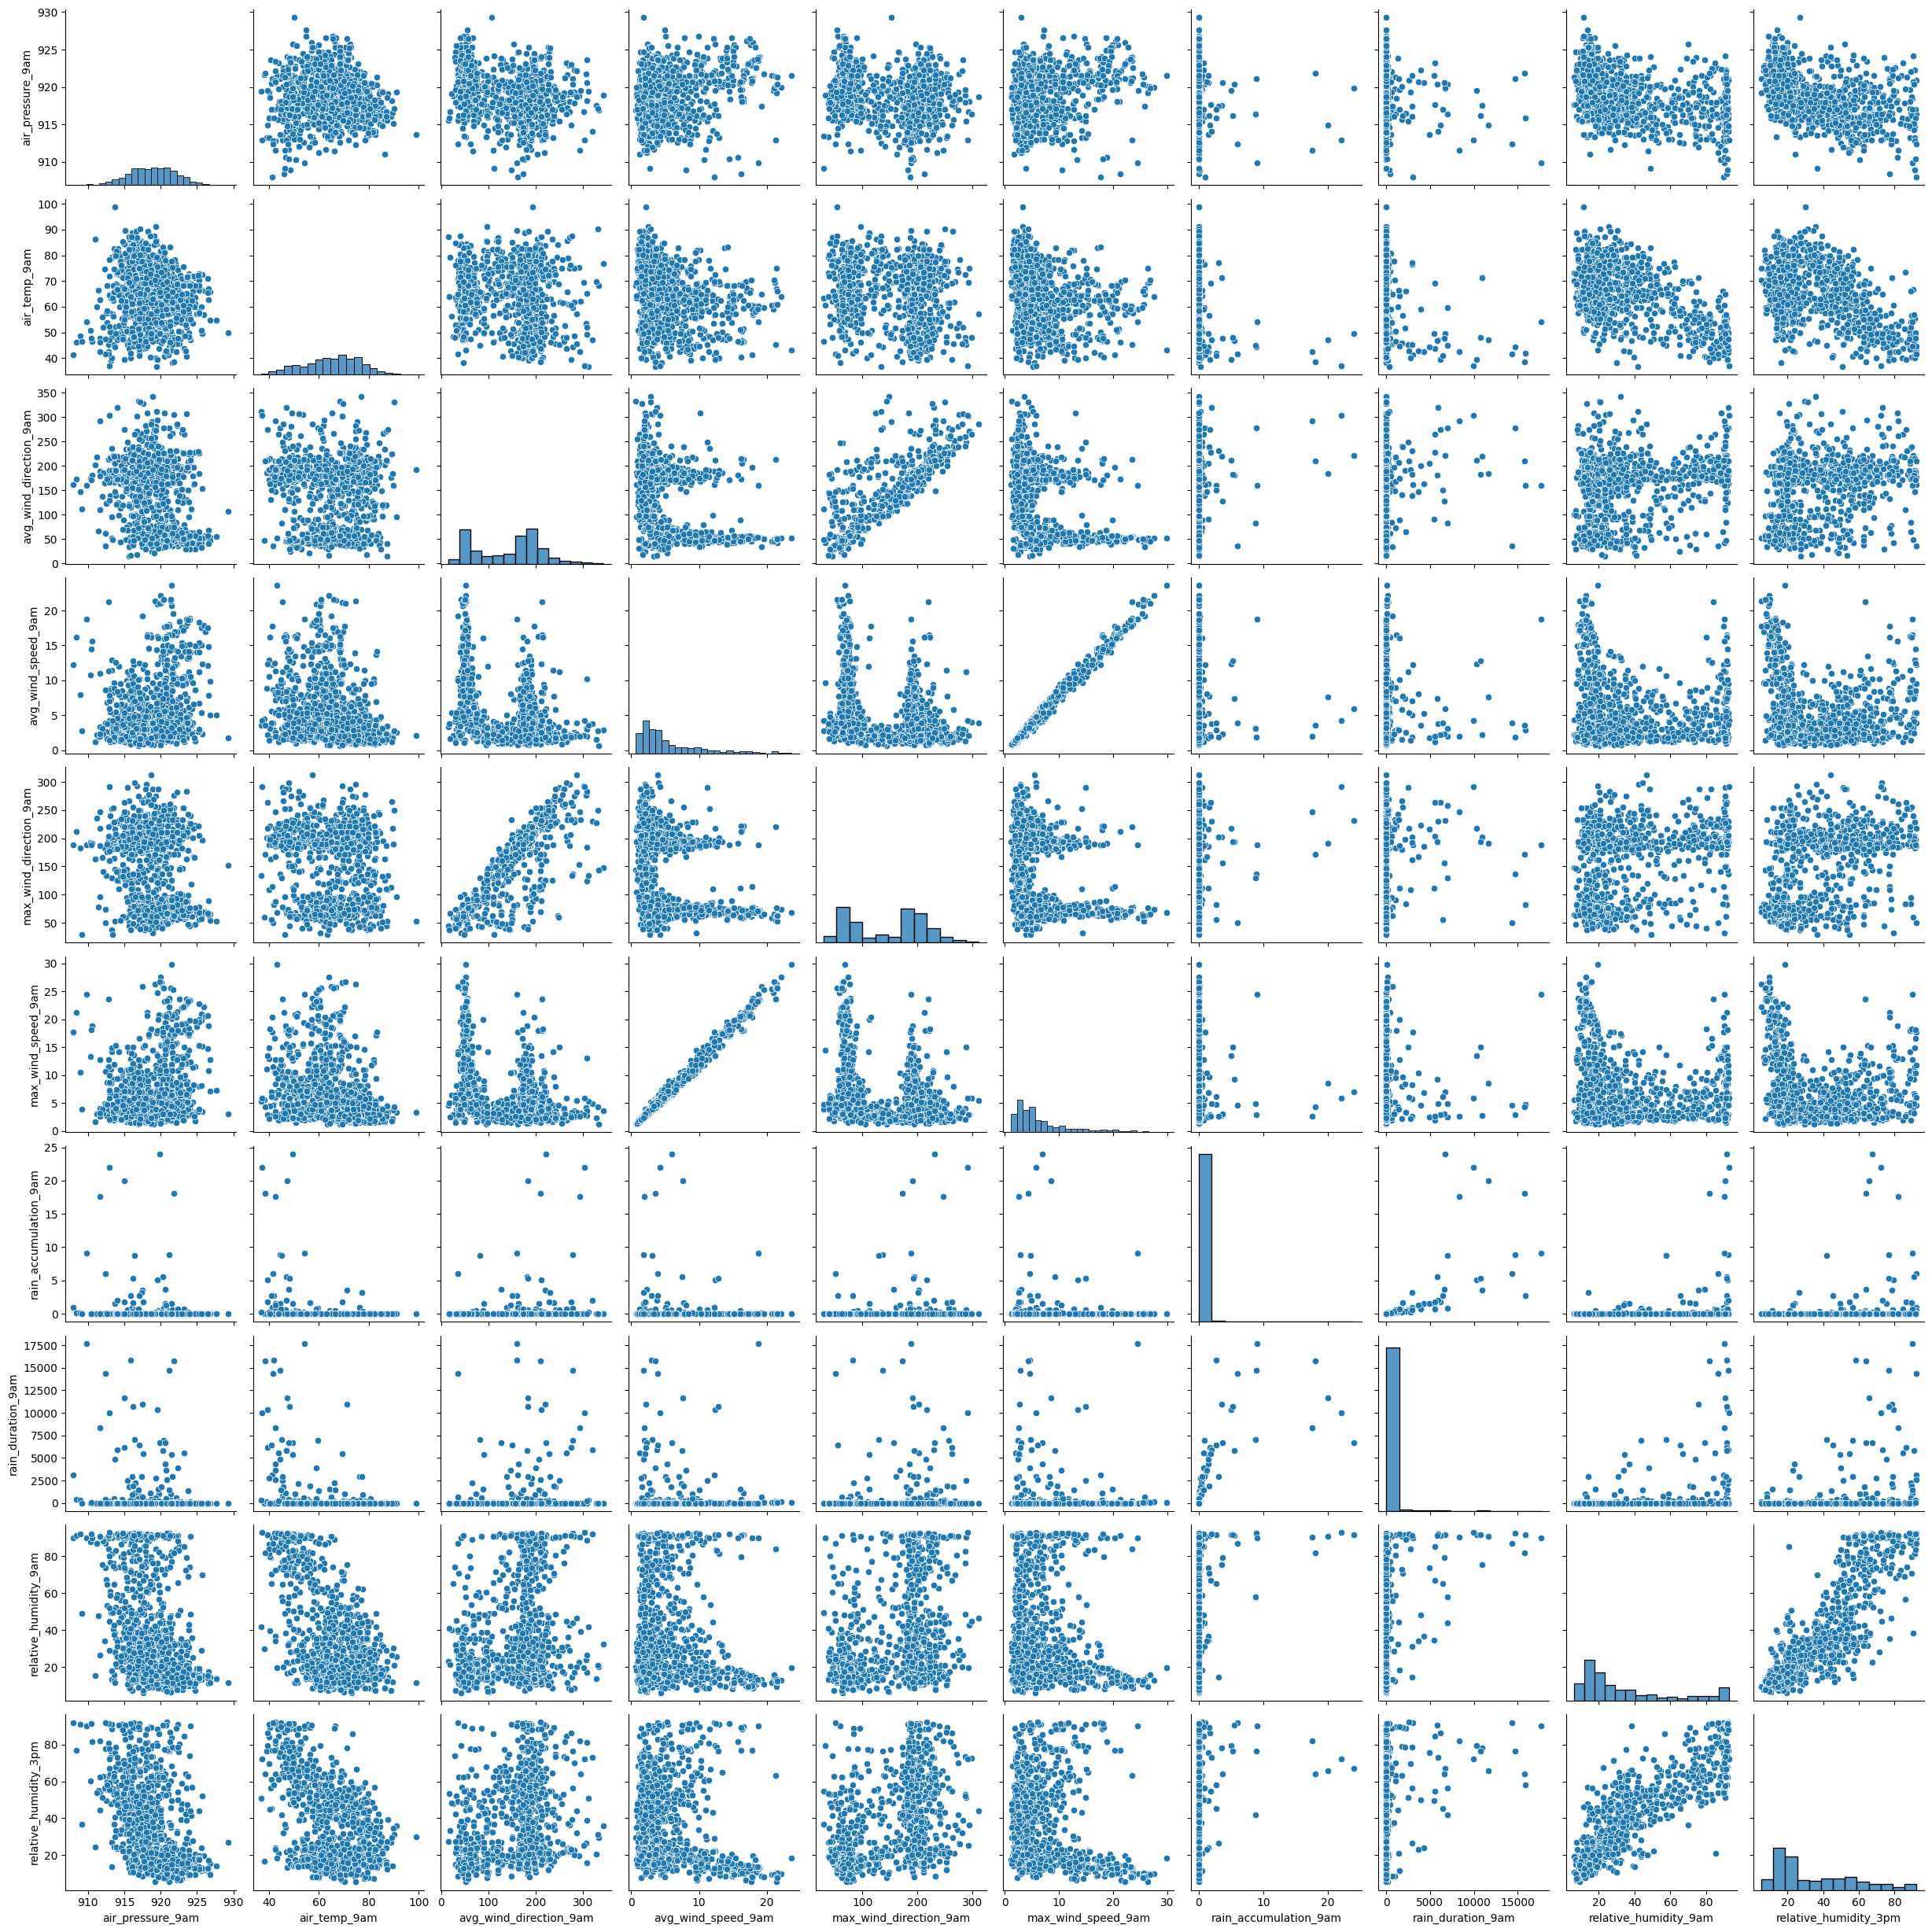

In [69]:
sns.pairplot(data)

<p style="font-family: Arial; font-size:1.75em; font-style:bold">
Correlation Heatmap of Meteorological Variables<br><br></p>

<Axes: >

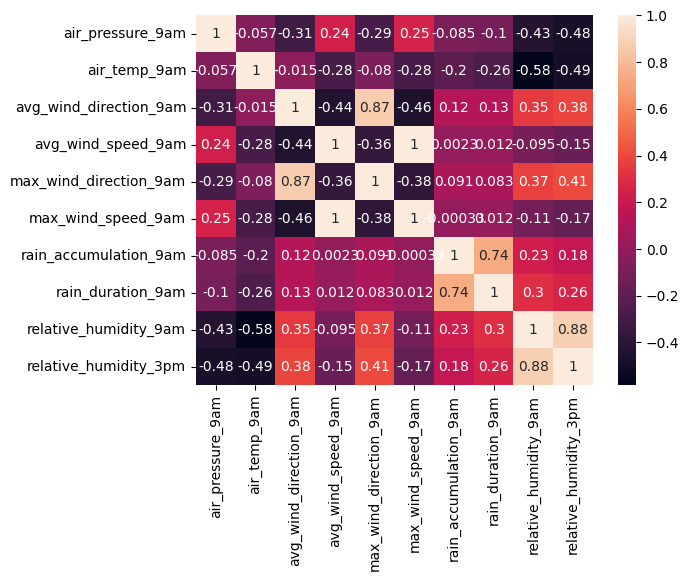

In [72]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True,)

<p style="font-family: Arial; font-size:1.75em; font-style:bold">
Distribution of Morning Air Temperature<br><br></p>

<Axes: xlabel='air_temp_9am', ylabel='Count'>

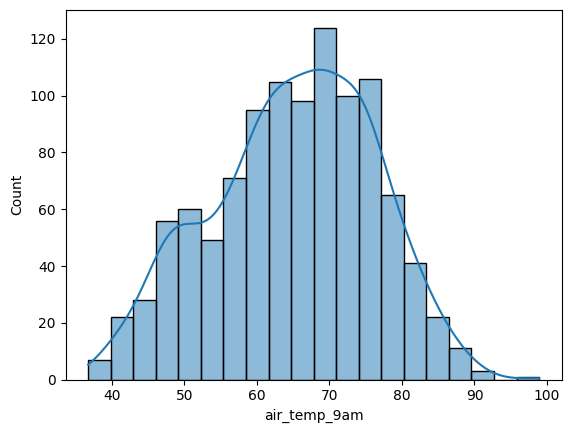

In [74]:
sns.histplot(data['air_temp_9am'], kde=True)


<p style="font-family: Arial; font-size:1.75em; font-style:bold">
<br>Relationship Between Relative Humidity at 9am and 3pm<br></p>

<Axes: xlabel='relative_humidity_9am', ylabel='relative_humidity_3pm'>

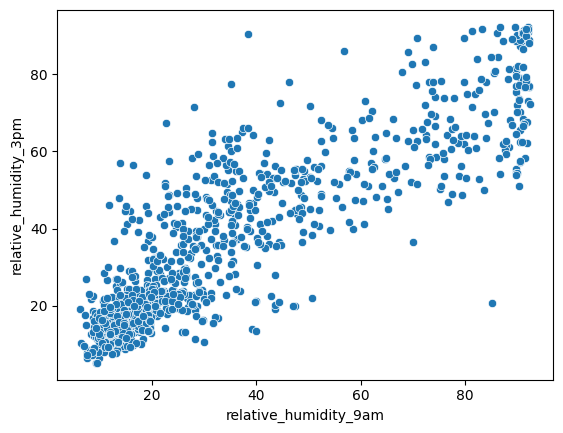

In [76]:
sns.scatterplot(x='relative_humidity_9am', y='relative_humidity_3pm', data=data)


<Axes: ylabel='air_temp_9am'>

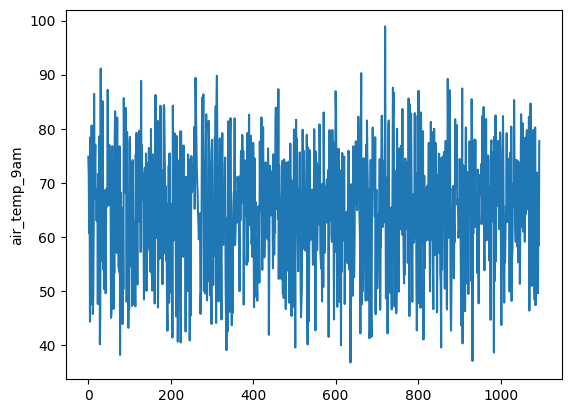

In [78]:
sns.lineplot(x=data.index, y='air_temp_9am', data=data)

<hr>

# Convert to a Classification Task 
Binarize the relative_humidity_3pm to 0 or 1.<br>
Here higher humidity level is taken anything more than 25%, but it depends from city to city. For example 25% humidity in New Delhi is quite high and therefore more posibility of rain but for city like Mumbai 60% is anual average humidity level. So for Mumbai something like 85% or more can cause rain.


In [46]:
clean_data = data.copy()
humidity_level=24.99
clean_data['high_humidity_label'] = (clean_data['relative_humidity_3pm'] > humidity_level)*1
print(clean_data['high_humidity_label'])

0       1
1       0
2       0
3       0
4       1
       ..
1090    1
1091    1
1092    1
1093    1
1094    0
Name: high_humidity_label, Length: 1064, dtype: int64


<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Target is stored in 'y'.
<br><br></p>


In [47]:
y=clean_data[['high_humidity_label']].copy()
y

,high_humidity_label
0,1
1,0
2,0
3,0
4,1
...,...
1090,1
1091,1
1092,1
1093,1


In [48]:
clean_data['relative_humidity_3pm'].head()

0    36.160000
1    19.426597
2    14.460000
3    12.742547
4    76.740000
Name: relative_humidity_3pm, dtype: float64

In [49]:
y.head()

,high_humidity_label
0,1
1,0
2,0
3,0
4,1


<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Use 9am Sensor Signals as Features to Predict Humidity at 3pm
<br><br></p>


In [50]:
morning_features = ['air_pressure_9am','air_temp_9am','avg_wind_direction_9am','avg_wind_speed_9am',
        'max_wind_direction_9am','max_wind_speed_9am','rain_accumulation_9am',
        'rain_duration_9am']

In [51]:
X = clean_data[morning_features].copy()

In [52]:
X.columns

Index(['air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am'],
      dtype='object')

In [53]:
y.columns

Index(['high_humidity_label'], dtype='object')

<p style="font-family: Arial; font-size:1.75em; font-style:bold"><br>
Perform Test and Train split
<br><br></p>



In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [55]:
print(type(X_train),
type(X_test),
type(y_train),
type(y_test))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


In [56]:
X_train.head()

,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am
534,919.420000,53.114000,199.600000,5.883152,211.000000,7.135839,0.0,0.0
875,918.125062,68.244150,54.662256,16.250912,73.237211,20.704746,0.0,0.0
582,917.848287,72.359534,174.715432,2.916904,191.976255,3.579045,0.0,0.0
91,915.320000,83.840000,219.900000,1.521119,245.000000,2.057985,0.0,0.0
107,918.122967,69.687373,224.594884,3.650134,242.077668,4.774079,0.0,0.0


In [57]:
y_train.head()

,high_humidity_label
534,1
875,0
582,0
91,1
107,0


<p style="font-family: Arial; font-size:1.75em; font-style:bold"><br>
Fit on Train Set
<br><br></p>

In [58]:
humidity_classifier = DecisionTreeClassifier(max_leaf_nodes=10, random_state=101)
humidity_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=10, random_state=101)

In [59]:
type(humidity_classifier)

sklearn.tree._classes.DecisionTreeClassifier

<p style="font-family: Arial; font-size:1.75em; font-style:bold"><br>
Predict on Test Set 
<br><br></p>

In [60]:
predictions = humidity_classifier.predict(X_test)

In [61]:
predictions[:10]

array([1, 0, 1, 0, 0, 1, 1, 0, 1, 0])

In [62]:
y_test['high_humidity_label'][:10]

192     0
789     0
1071    1
271     1
458     0
606     1
428     1
423     1
141     0
941     0
Name: high_humidity_label, dtype: int64

<p style="font-family: Arial; font-size:1.75em; font-style:bold"><br>
Measure Accuracy of the Classifier
<br><br></p>

In [63]:
accuracy_score(y_true = y_test, y_pred = predictions)

0.7652582159624414

<p style="font-family: Arial; font-size:1.75em; font-style:bold"><br>
Classification Report
<br><br></p>



In [64]:
from sklearn.metrics import classification_report

In [66]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.68      0.74       105
           1       0.73      0.85      0.79       108

    accuracy                           0.77       213
   macro avg       0.77      0.76      0.76       213
weighted avg       0.77      0.77      0.76       213

